In [1]:
import requests
import time
from datetime import date,datetime,timezone
from matplotlib import pyplot as plt
from matplotlib import rcParams

# settings to make larger plots
rcParams['figure.figsize'] = [20, 9]
plt.rcParams.update({'font.size': 22})

In [4]:
# code to pull current stock price
finn_key="YOUR KEY"
base_url = "https://finnhub.io/api/v1/quote"
params = {'symbol':'AAPL',
          'token':'btv5stv48v6q7nvmtsjg'}
response = requests.get(base_url,params=params)

In [5]:
# code to pull daily stock prices from 9-9-20 to 10-9-20
base_url = "https://finnhub.io/api/v1/stock/candle"
# from and to are UNIX timestamps defined as number of seconds
# from midnight Jan 1, 1970
params = {'symbol':'AAPL',
          'resolution':'D',
          'from':1599685200,
          'to':1602277200,
          'token':finn_key}
response = requests.get(base_url,params=params).json()

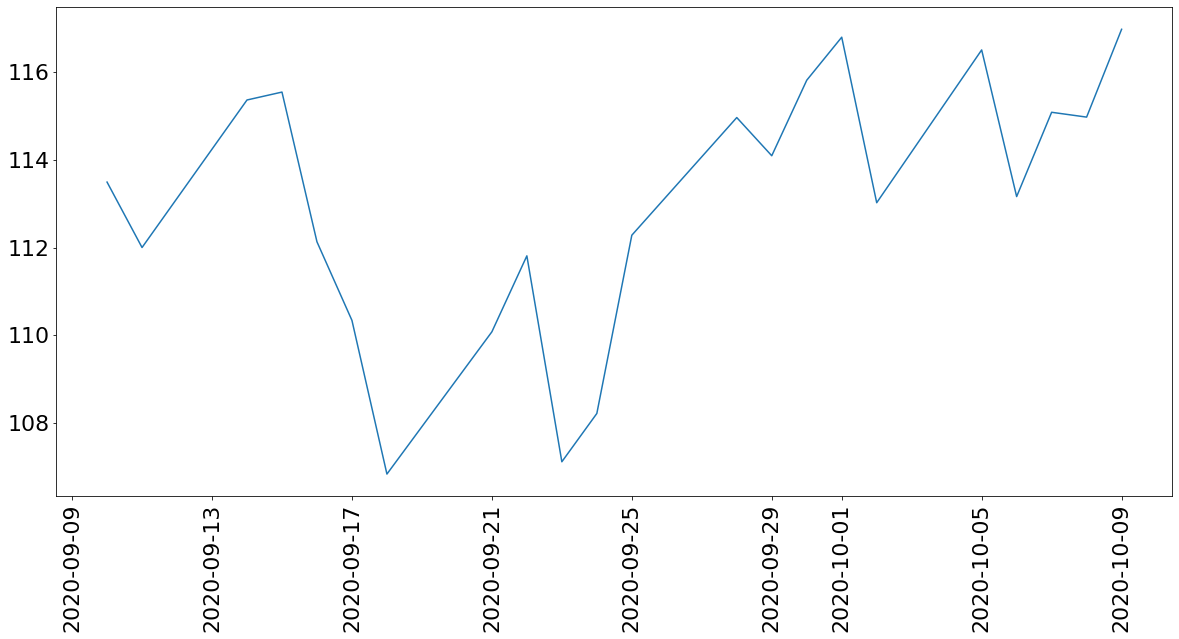

In [6]:
# response includes
# 'c' closing price
# 't' timestamp defined as above
y = response['c']

# list comprehension to convert timestamp into a date string
x = [datetime.utcfromtimestamp(d) for d in response['t']]
plt.xticks(rotation=90)
plt.plot(x,y)